Correlation between demographic attributes and total tweet counts 

In [303]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Get the tweet counts per victim
data = pd.read_csv('df-relatedToHomicide.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
df = data.groupby(['victim_name', 'victim_age', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency'], sort=False).size().reset_index(name='counts')

df['victim_age'] = df['victim_age'].apply(lambda x: np.nan if x == 'None' else x)
df['victim_age'] = df['victim_age'].astype(float)
df['victim_age'].fillna(df['victim_age'].mean(), inplace=True)
df['victim_age'] = df['victim_age'].round().astype(int)


In [304]:
categorical_cols = ['victim_name', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
df

,victim_name,victim_age,victim_gender,victim_race,cause_of_death,if_officer_involved,death_location,agency,counts
0,77,47,1,1,5,0,140,11,40
1,350,72,1,0,5,1,11,11,19048
2,463,64,1,0,5,1,12,11,208
3,453,68,1,0,5,1,12,11,201
4,79,76,1,0,5,1,12,11,207
...,...,...,...,...,...,...,...,...,...
469,336,20,1,1,1,1,196,17,1
470,54,28,1,1,1,1,196,17,1
471,171,61,1,7,0,1,147,11,2
472,162,30,1,3,1,1,115,11,1


In [305]:
X = df.drop(['counts', 'victim_name', 'agency'], axis=1)
y = df['counts']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42) 
rf.fit(X, y) # Train the model
print("score: ", rf.score(X, y)) 

# Print feature importance with corresponding feature names
feature_importance = rf.feature_importances_
print("importance of features:", feature_importance)

score:  0.5211931010562798
importance of features: [0.27665961 0.00237254 0.09473455 0.0091707  0.14177266 0.47528993]


In [294]:
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
importance_df['importance'] = importance_df['importance'].round(5) 

importance_df

,feature,importance
0,victim_age,0.27666
1,victim_gender,0.00237
2,victim_race,0.09473
3,cause_of_death,0.00917
4,if_officer_involved,0.14177
5,death_location,0.47529


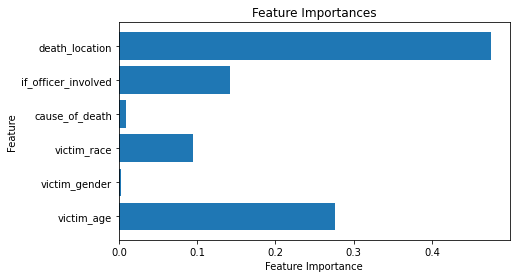

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [299]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Get the tweet counts per victim
data = pd.read_csv('df-relatedToHomicide.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
df = data.groupby(['victim_name', 'victim_age', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency'], sort=False).size().reset_index(name='counts')

df['victim_age'] = df['victim_age'].apply(lambda x: np.nan if x == 'None' else x)
df['victim_age'] = df['victim_age'].astype(float)
df['victim_age'].fillna(df['victim_age'].mean(), inplace=True)
df['victim_age'] = df['victim_age'].round().astype(int)

df

,victim_name,victim_age,victim_gender,victim_race,cause_of_death,if_officer_involved,death_location,agency,counts
0,Charles Robert Towns,47,Male,Black,Unknown,Officer-involved,In Front Of 2157 El Serano Ave,LASD,40
1,Ming Wei Ma,72,Male,Asian,Unknown,Unknown,122 West Garvey Ave #B,LASD,19048
2,Wen Tau Yu,64,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,208
3,Valentino Marcos Alvero,68,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,201
4,Chia Ling Yau,76,Male,Asian,Unknown,Unknown,122 West Garvey Avenue #B,LASD,207
...,...,...,...,...,...,...,...,...,...
469,Michael Di'Shawn Radford,20,Male,Black,Gunshot,Unknown,Torrance,Torrance PD,1
470,Astin Kyle Edwards,28,Male,Black,Gunshot,Unknown,Torrance,Torrance PD,1
471,Frank Borsotti,61,Male,White,Blunt force,Unknown,Lancaster,LASD,2
472,Fael Valente,30,Male,Latino,Gunshot,Unknown,East Los Angeles,LASD,1


In [297]:
categorical_cols = ['victim_name', 'victim_gender', 'victim_race', 'cause_of_death', 'if_officer_involved', 'death_location', 'agency']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
new_df = df.drop(['victim_name', 'agency'], axis=1)
new_df

,victim_age,victim_gender,victim_race,cause_of_death,if_officer_involved,death_location,counts
0,47.0,1,1,5,0,140,40
1,72.0,1,0,5,1,11,19048
2,64.0,1,0,5,1,12,208
3,68.0,1,0,5,1,12,201
4,76.0,1,0,5,1,12,207
...,...,...,...,...,...,...,...
469,20.0,1,1,1,1,196,1
470,28.0,1,1,1,1,196,1
471,61.0,1,7,0,1,147,2
472,30.0,1,3,1,1,115,1


In [298]:
new_df.corr().loc['counts', :]

victim_age             0.089006
victim_gender          0.015696
victim_race           -0.094810
cause_of_death         0.066425
if_officer_involved   -0.045220
death_location        -0.087109
counts                 1.000000
Name: counts, dtype: float64

Commonality of victims with top number of tweets

In [269]:
data = pd.read_csv('df-relatedToHomicide.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
df = data.groupby(['victim_name', 'death_location', 'victim_age', 'victim_gender', 'cause_of_death', 'victim_race', 'agency', 'if_officer_involved'], sort = False).size().reset_index(name='counts')

df_sorted = df.sort_values(by='counts', ascending=False)
df_sorted

,victim_name,death_location,victim_age,victim_gender,cause_of_death,victim_race,agency,if_officer_involved,counts
1,Ming Wei Ma,122 West Garvey Ave #B,72,Male,Unknown,Asian,LASD,Unknown,19048
428,Ryan Twyman,Willowbrook,24,Male,Gunshot,Black,LASD,Officer-involved,6703
18,Roberto Alonso,1000 East Avenue Q #I105,34,Male,Unknown,Latino,LASD,Unknown,2205
426,Joseph Gilbert Solano,Alhambra,50,Male,Pending,Latino,Unknown,Unknown,1729
16,Oscar Sanchez,1109 East 28Th Street,35,Male,Unknown,Latino,LAPD,Officer-involved,818
...,...,...,...,...,...,...,...,...,...
349,Jose Jesus Martinez,Gardena,42,Male,Gunshot,Latino,LASD,Unknown,1
350,Jose Falcon,Boyle Heights,26,Male,Gunshot,Latino,LAPD,Unknown,1
352,Javier Lopez Jr.,Norwalk,33,Male,Gunshot,Latino,LASD,Unknown,1
353,Omar Medina,Pacoima,27,Male,Gunshot,Latino,LAPD,Unknown,1


In [270]:
top_victims = df_sorted.head(20)

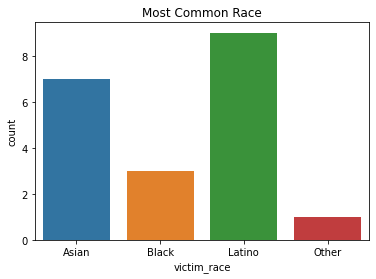

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='victim_race', data=top_victims)
plt.title('Most Common Race')

plt.show()


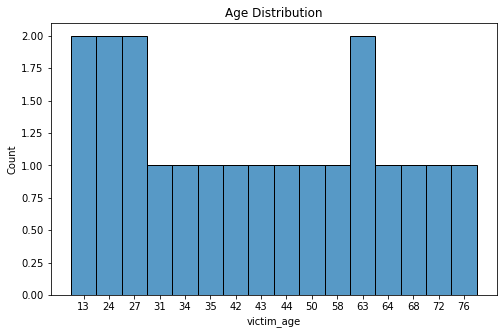

In [272]:
age_sorted = top_victims.sort_values('victim_age', ascending=True)
plt.figure(figsize=(8, 5))
sns.histplot(x='victim_age', data=age_sorted)
plt.title('Age Distribution')

plt.show()

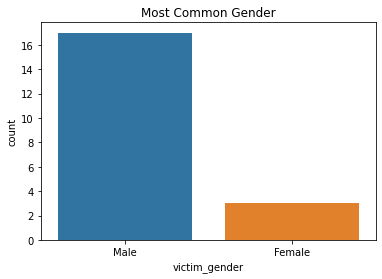

In [273]:
sns.countplot(x='victim_gender', data=top_victims)
plt.title('Most Common Gender')
plt.show()

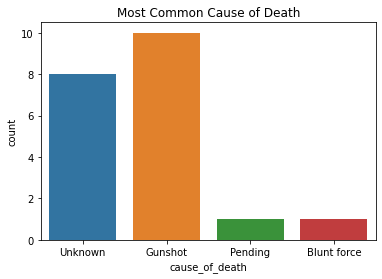

In [274]:
sns.countplot(x='cause_of_death', data=top_victims)
plt.title('Most Common Cause of Death')
plt.show()

Total tweet counts associated with each feature

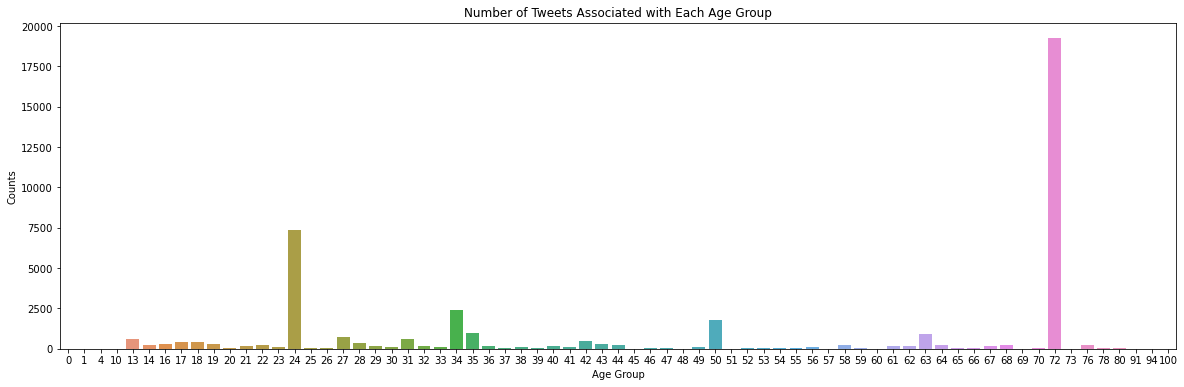

In [275]:
df['victim_age'] = df['victim_age'].apply(lambda x: np.nan if x == 'None' else x)
df['victim_age'] = df['victim_age'].astype(float)
df['victim_age'].fillna(df['victim_age'].mean(), inplace=True)

df_sorted = df.sort_values(by='counts', ascending=False)
df_sorted['victim_age_rounded'] = df_sorted['victim_age'].round().astype(int) 

age_counts = df_sorted.groupby('victim_age_rounded')['counts'].sum()
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Age Group')
plt.show()


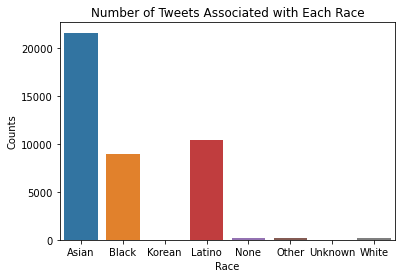

In [276]:
race_counts = df_sorted.groupby('victim_race')['counts'].sum()

fig, ax = plt.subplots()
sns.barplot(x=race_counts.index, y=race_counts.values, ax=ax)
ax.set_xlabel('Race')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Race')
plt.show()

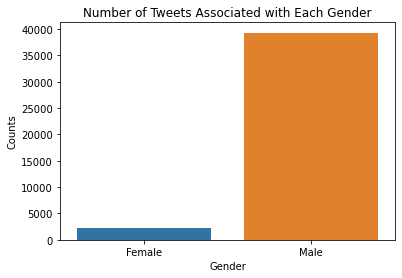

In [277]:
gender_counts = df_sorted.groupby('victim_gender')['counts'].sum()

fig, ax = plt.subplots()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets Associated with Each Gender')
plt.show()